<a href="https://colab.research.google.com/github/com0040/python_MechinLearning_and_DeepLearning_Basic/blob/main/17_%EC%B5%9C%EC%A0%81%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
# 옷 데이터
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_input.shape

(60000, 28, 28)

In [ ]:
test_input.shape

(10000, 28, 28)

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.1)

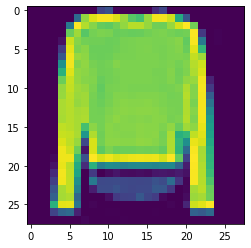

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_input[0])

In [ ]:
# 픽셀값0-255 / 0에 가까울 수록 검은색, 255에 가까울수록 흰색
# 정규화 / 255

train_scaled = train_input.reshape(-1, 28*28) / 255
val_scaled = val_input.reshape(-1, 784) / 255
test_scaled = test_input.reshape(-1, 784) / 255

In [ ]:
train_scaled.shape

(54000, 784)

In [ ]:
# from sklearn.utils import validation
model = keras.Sequential() # 도화지
model.add(keras.layers.Dense(256, activation = 'relu', input_shape = (784,)))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation ='softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

hist = model.fit(train_scaled, train_target, epochs = 30, validation_data = (val_scaled, val_target))

Epoch 1/30
1688/1688 [==============================] - 8s 4ms/step - loss: 0.4990 - accuracy: 0.8190 - val_loss: 0.4840 - val_accuracy: 0.8255
Epoch 2/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3879 - accuracy: 0.8624 - val_loss: 0.3874 - val_accuracy: 0.8707
Epoch 3/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3637 - accuracy: 0.8726 - val_loss: 0.4074 - val_accuracy: 0.8583
Epoch 4/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3545 - accuracy: 0.8780 - val_loss: 0.4360 - val_accuracy: 0.8583
Epoch 5/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3456 - accuracy: 0.8817 - val_loss: 0.4094 - val_accuracy: 0.8702
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3377 - accuracy: 0.8842 - val_loss: 0.4334 - val_accuracy: 0.8670
Epoch 7/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3366 - accuracy: 0.8880 - val_loss: 0.4435 - val_accuracy:

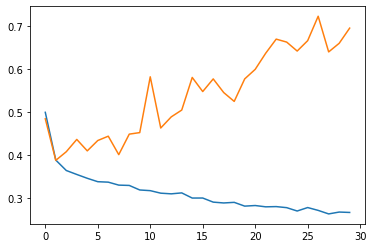

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss']) # 과대적합 

In [ ]:
model = keras.Sequential() # 도화지
model.add(keras.layers.Dense(256, activation = 'relu', input_shape = (784,)))
model.add(keras.layers.Dropout(0.3)) # 이 은닉층의 30 프로는 랜덤으로 끄겠다.
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.3)) # 이 은닉층의 30 프로는 랜덤으로 끄겠다.
model.add(keras.layers.Dense(10, activation ='softmax'))

# 5번 연속으로 나빠지지면 학습 강제종료. 마지막 5번은 삭제한다. 
es = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
cp = keras.callbacks.ModelCheckpoint('best.h5')

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy', optimizer = 'adam') # 학습률 조정

hist = model.fit(train_scaled, train_target, epochs = 30, validation_data = (val_scaled, val_target),
                 callbacks = [es,cp])

Epoch 1/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5827 - accuracy: 0.7918 - val_loss: 0.4051 - val_accuracy: 0.8537
Epoch 2/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4381 - accuracy: 0.8400 - val_loss: 0.3776 - val_accuracy: 0.8588
Epoch 3/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4051 - accuracy: 0.8524 - val_loss: 0.3714 - val_accuracy: 0.8593
Epoch 4/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3826 - accuracy: 0.8609 - val_loss: 0.3412 - val_accuracy: 0.8702
Epoch 5/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3687 - accuracy: 0.8661 - val_loss: 0.3345 - val_accuracy: 0.8785
Epoch 6/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3534 - accuracy: 0.8710 - val_loss: 0.3285 - val_accuracy: 0.8825
Epoch 7/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3433 - accuracy: 0.8741 - val_loss: 0.3316 - val_accuracy:

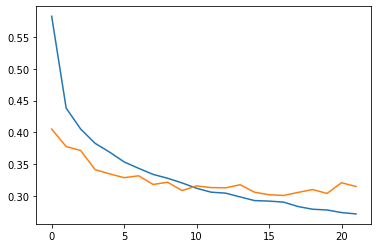

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])